In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Data cleaning

In [23]:
#importing training data
train = pd.read_csv('train.csv')

In [24]:
# Display the training dataset
train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,94224,15748608,Gordon,619,Germany,Female,32.0,8,175406.13,1,1.0,0.0,172792.43,1
1,148424,15651450,Chu,676,Germany,Female,40.0,4,180520.41,2,1.0,1.0,171045.25,0
2,10745,15588560,Scott,748,France,Female,39.0,8,0.00,1,0.0,0.0,57323.18,1
3,30133,15683363,Goddard,641,France,Female,39.0,4,0.00,1,1.0,0.0,45309.24,1
4,138709,15790594,Tien,688,Germany,Male,42.0,9,161588.89,2,0.0,1.0,54019.93,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148526,20053,15794048,Ritchie,685,Spain,Male,44.0,7,122570.69,1,0.0,1.0,84760.32,1
148527,111771,15803681,Fiorentino,650,France,Female,49.0,7,116993.65,2,1.0,0.0,160589.85,0
148528,131097,15597951,Genovesi,637,Spain,Male,40.0,5,0.00,2,1.0,0.0,94488.82,1
148529,8620,15737051,Nwokezuike,739,France,Female,53.0,5,0.00,1,1.0,0.0,120801.65,1


In [25]:
# Display data types of each column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148531 entries, 0 to 148530
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               148531 non-null  int64  
 1   CustomerId       148531 non-null  int64  
 2   Surname          148531 non-null  object 
 3   CreditScore      148531 non-null  int64  
 4   Geography        148531 non-null  object 
 5   Gender           148531 non-null  object 
 6   Age              148531 non-null  float64
 7   Tenure           148531 non-null  int64  
 8   Balance          148531 non-null  float64
 9   NumOfProducts    148531 non-null  int64  
 10  HasCrCard        148531 non-null  float64
 11  IsActiveMember   148531 non-null  float64
 12  EstimatedSalary  148531 non-null  float64
 13  Churn            148531 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 15.9+ MB


In [26]:
# Check for missing values
train.isnull().sum() ##there are not missing values

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churn              0
dtype: int64

In [27]:
# Basic statistics
train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,148531.000000,1.485310e+05,148531.000000,148531.000000,148531.000000,148531.000000,148531.000000,148531.00000,148531.000000,148531.000000,148531.000000
mean,82549.661848,1.569205e+07,656.469168,38.121300,5.022184,55436.712123,1.554692,0.75422,0.497479,112504.758411,0.211599
std,47622.558340,7.143646e+04,80.051965,8.872704,2.803853,62785.290142,0.547990,0.43055,0.499995,50321.231998,0.408443
min,0.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,41346.500000,1.563319e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.00000,0.000000,74588.410000,0.000000
50%,82502.000000,1.569016e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.00000,0.000000,117833.570000,0.000000
75%,123787.500000,1.575690e+07,710.000000,42.000000,7.000000,119799.270000,2.000000,1.00000,1.000000,155023.930000,0.000000
max,165033.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Exploratory data analysis

In the following images, we observe histograms for the numerical variables. It is noteworthy that approximately 54% of the customers have a balance of zero, most customers have one or two products, and 50% of the customers are between 32 and 42 years old.

Regarding the qualitative variables, the customers are distributed across three countries: Germany, France, and Spain. The majority are men, have a credit card and 49.7% are active and 21 churn.

In the box plots, we observe that the variables number of products and age seem to show differences when there is churn. In the bar charts divided by churn, the more active customers seems to have less churn.

In the correlation matrix, we observe low correlations between the explanatory variables.


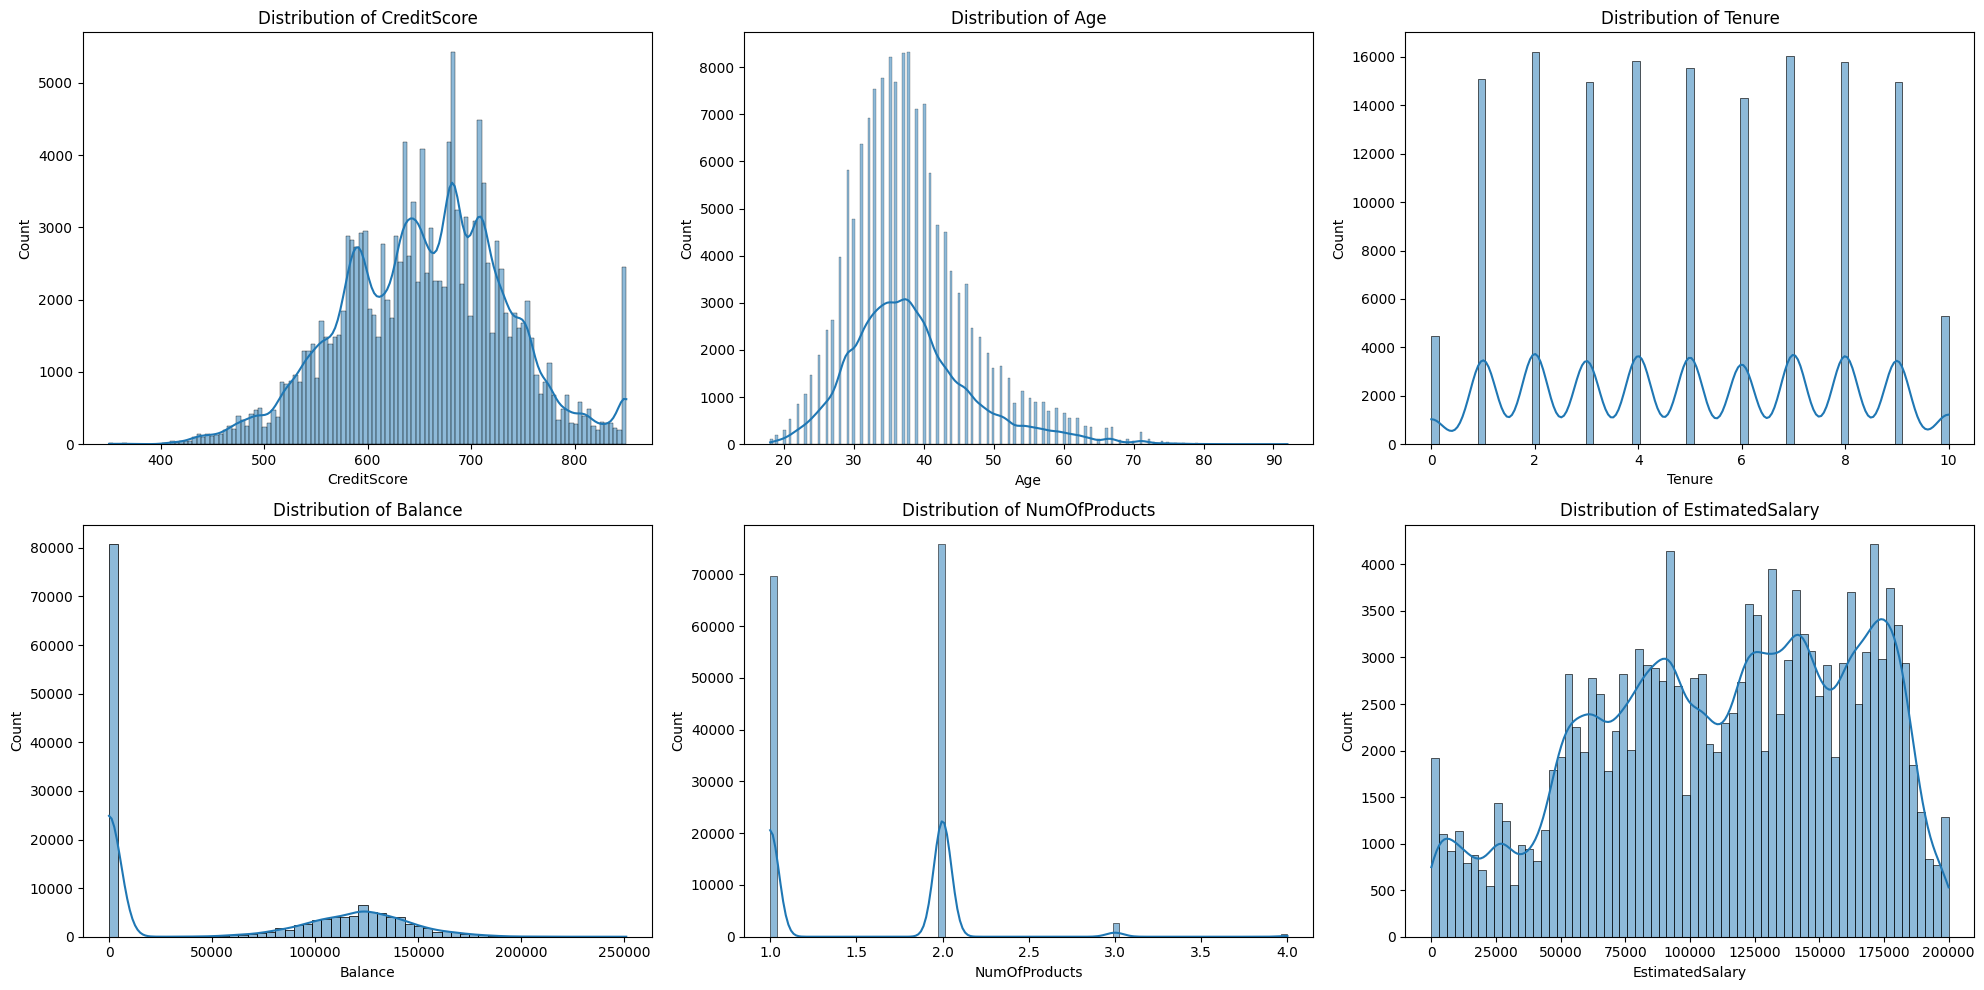

In [28]:
# Plot distributions of numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

plt.figure(figsize=(20, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

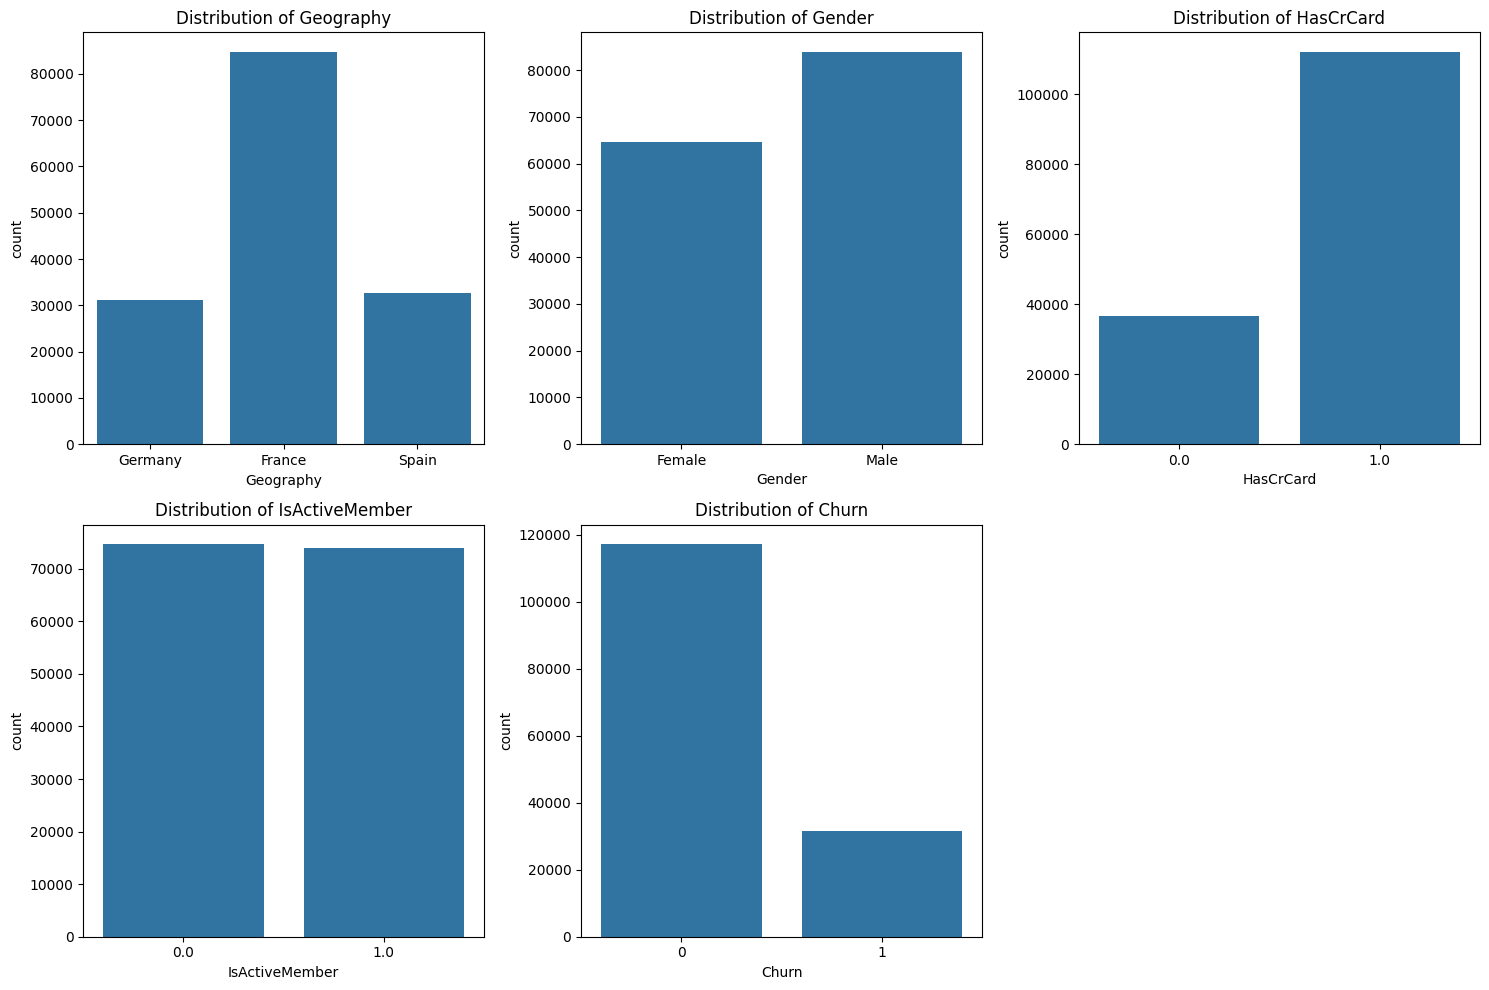

In [29]:
# Plot distributions of categorical features
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Churn']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=train, x=feature)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [30]:
# Explore the distribution of the target variable (Churn)
# 21% of custumers churn
print(train['Churn'].value_counts())
print(train['IsActiveMember'].value_counts())

Churn
0    117102
1     31429
Name: count, dtype: int64
IsActiveMember
0.0    74640
1.0    73891
Name: count, dtype: int64


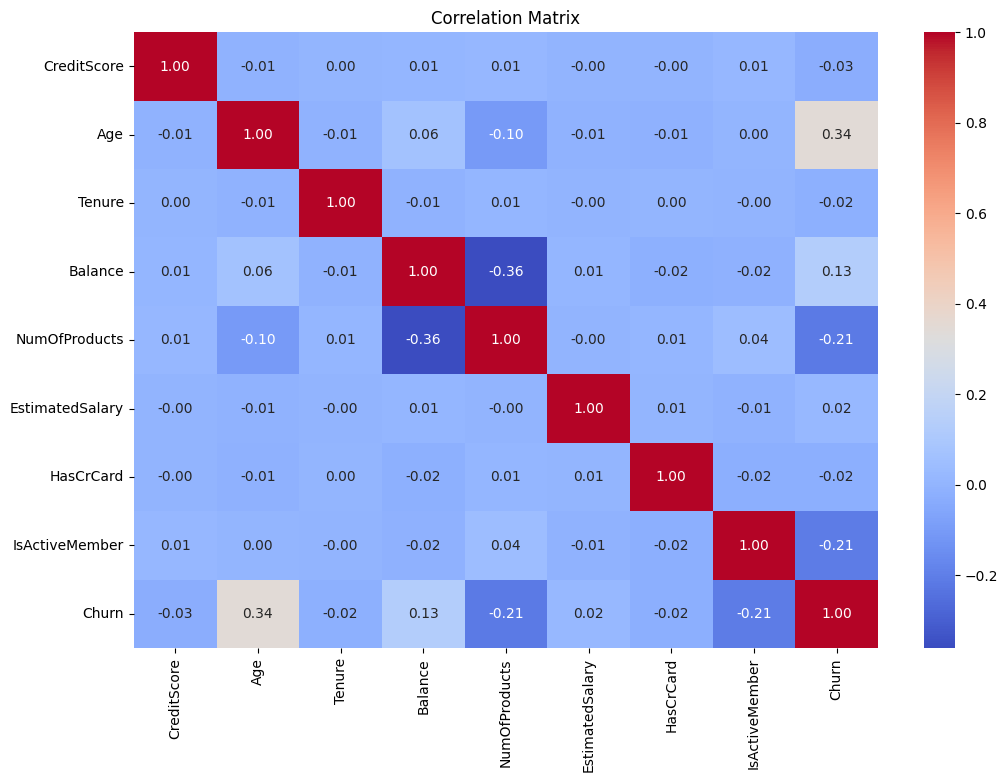

In [31]:
# Compute correlation matrix
correlation_matrix = train[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'HasCrCard', 'IsActiveMember', 'Churn']].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [32]:
# Convert categorical variables to numerical for the pair plot
train_df_encoded = pd.get_dummies(train, columns=['Geography', 'Gender'], drop_first=True)

In [33]:
train_df_encoded.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churn', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male'],
      dtype='object')

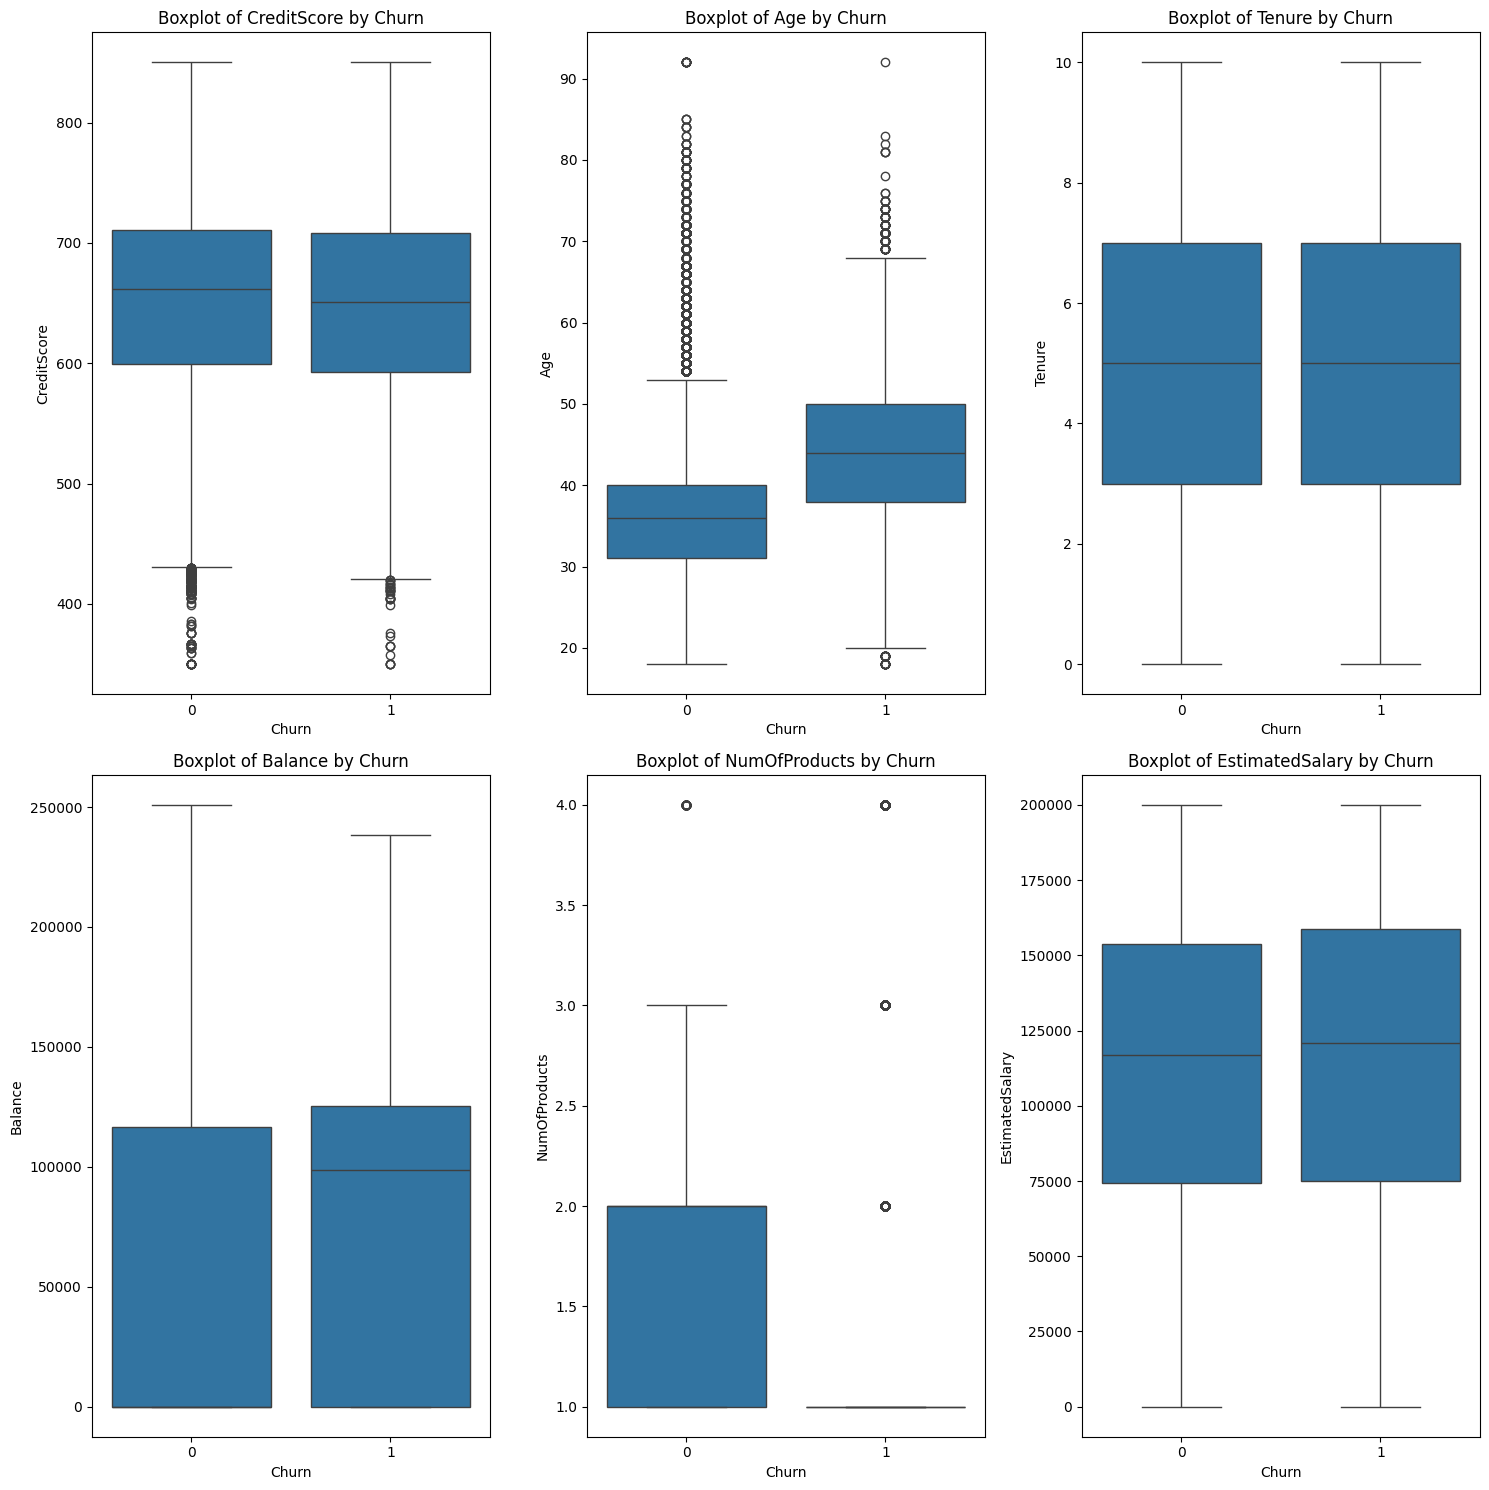

In [34]:
# Create boxplots for each continuous feature, divided by 'Churn'
plt.figure(figsize=(15, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Churn', y=feature, data=train)
    plt.title(f'Boxplot of {feature} by Churn')
plt.tight_layout()
plt.show()

Geography
Gender
HasCrCard
IsActiveMember


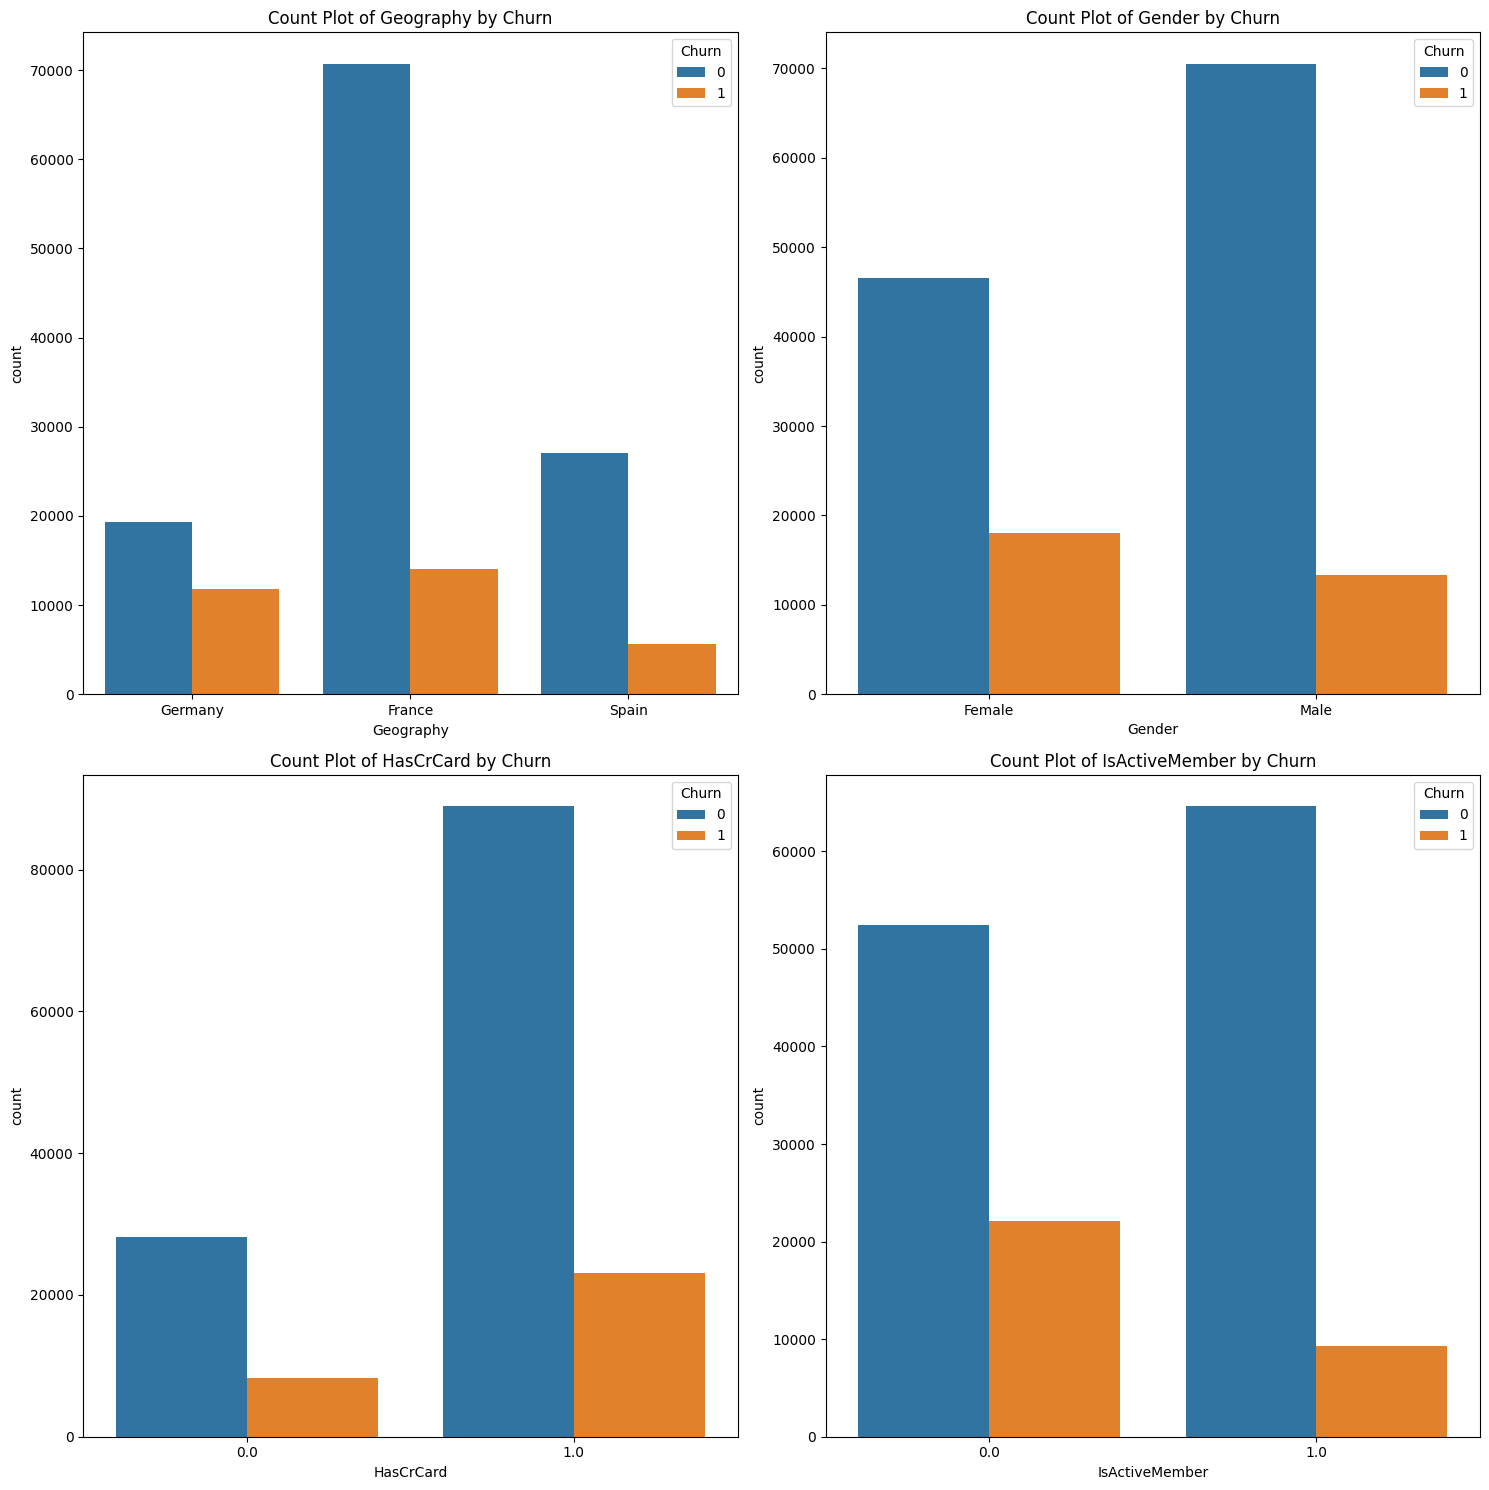

In [35]:
# Create count plots for each categorical feature, divided by 'Churn'
plt.figure(figsize=(15, 15))
for i, feature in enumerate(categorical_features[:-1], 1):
    print(feature)
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, hue='Churn', data=train)
    plt.title(f'Count Plot of {feature} by Churn')
plt.tight_layout()
plt.show()

# Model Building
### Methodology
Given that the proportion of churn is 21%, there is a class imbalance in the dataset. In this case, using accuracy as the sole metric can be misleading because a model that always predicts the majority class (class 0) can still achieve high accuracy but will perform poorly on the minority class. Instead, we will focus on the F1 score because we will give equal importance to both types of errors. If we knew for certain which error is more important, we could also use precision or recall.

Para encontar el mejor modelo para ajustar los datos 2 aproaches:
1- Definimos y entrenamos varios modelos de machine learning: Logistic Regression, Random Forest and XGBoost. Para cada modelo, entrenamos con los datos de entrenamiento y evaluamos su rendimiento en los datos de validación utilizando principalmente f1-score 
2- Utilizamos TPOT para encontrar el mejor pipeline automáticamente. TPOT es una herramienta que utiliza algoritmos genéticos para optimizar y seleccionar pipelines de machine learning. Especificamos el número de generaciones, tamaño de la población, métrica de evaluación (f1-score), y otros parámetros.

### Results

The results show that the best model is XGBoost, with the TPOT-generated model being a close second. We proceed to use the best model to classify the customers in the inference dataset.



In [36]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report
from tpot import TPOTClassifier

# Select features and target variable
X = train[['CreditScore', 'Geography', 'Gender',
           'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
           'IsActiveMember', 'EstimatedSalary']]
y = train['Churn']

# Convert categorical variables to numerical
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)

# Normalize or scale numerical features using Min-Max Scaling
scaler = MinMaxScaler()
X[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = scaler.fit_transform(
    X[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]
)

# Save the scaler
joblib.dump(scaler, 'minmax_scaler.pkl')

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=419)

# Define and train models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(f'{name} - F1 Score: {f1_score(y_val, y_pred)}')
    print(classification_report(y_val, y_pred))
    joblib.dump(model, f'{name.replace(" ", "_").lower()}_model.pkl')

# Use TPOT to find the best pipeline
tpot = TPOTClassifier(
    generations=5,
    population_size=20,
    verbosity=2,
    random_state=419,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
tpot.fit(X_train, y_train)

# Evaluate the best pipeline found by TPOT
y_pred_tpot = tpot.predict(X_val)
print(f'TPOT - F1 Score: {f1_score(y_val, y_pred_tpot)}')
print(classification_report(y_val, y_pred_tpot))

# Export the best pipeline from TPOT
tpot.export('best_tpot_pipeline.py')

# Save the best model found by TPOT
joblib.dump(tpot.fitted_pipeline_, 'tpot_best_model.pkl')


Logistic Regression - F1 Score: 0.4872712401594929
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     23371
           1       0.69      0.38      0.49      6336

    accuracy                           0.83     29707
   macro avg       0.77      0.67      0.69     29707
weighted avg       0.82      0.83      0.81     29707

Random Forest - F1 Score: 0.6215016755728647
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     23371
           1       0.73      0.54      0.62      6336

    accuracy                           0.86     29707
   macro avg       0.81      0.74      0.77     29707
weighted avg       0.85      0.86      0.85     29707



c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:11:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - F1 Score: 0.6365847068359902
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     23371
           1       0.74      0.56      0.64      6336

    accuracy                           0.86     29707
   macro avg       0.81      0.75      0.78     29707
weighted avg       0.86      0.86      0.86     29707



Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6308632332267741

Generation 2 - Current best internal CV score: 0.6328461521009852

Generation 3 - Current best internal CV score: 0.6335914621846289

Generation 4 - Current best internal CV score: 0.6335914621846289

Generation 5 - Current best internal CV score: 0.6335914621846289

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.9000000000000001, min_samples_leaf=13, min_samples_split=7, n_estimators=100)
TPOT - F1 Score: 0.6313605196679899
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     23371
           1       0.74      0.55      0.63      6336

    accuracy                           0.86     29707
   macro avg       0.81      0.75      0.77     29707
weighted avg       0.85      0.86      0.85     29707



['tpot_best_model.pkl']

In [38]:
# Load and preprocess inference data
inference_df = pd.read_csv('inference.csv')  # Adjust path as needed

# Convert categorical variables to numerical
inference_df_encoded = pd.get_dummies(inference_df, columns=['Geography', 'Gender'], drop_first=True)

# Ensure new data has the same columns as the training data
# Add missing columns with default values of 0
for col in X.columns:
    if col not in inference_df_encoded.columns:
        inference_df_encoded[col] = 0
inference_df_encoded = inference_df_encoded[X.columns]  # Ensure same column order

# Normalize or scale numerical features using the saved scaler
inference_df_encoded[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = scaler.transform(
    inference_df_encoded[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])

# Predict churn using the trained XGBoost model
xgb_model = joblib.load('xgboost_model.pkl')
inference_predictions = xgb_model.predict(inference_df_encoded)

# Save or process the predictions
inference_df['Churn'] = inference_predictions
inference_df.to_csv('inference_predictions.csv', index=False)